In [1]:
import numpy as np 
import pandas as pd
pd.options.display.max_columns = 100

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
py.init_notebook_mode(connected=True)
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)

In [2]:
# loading the datasets
train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [3]:
# taking a look at how many rows and columns the train dataset contains
rows = train.shape[0]
columns = train.shape[1]
print("The train dataset contains {0} rows and {1} columns".format(rows, columns))

The train dataset contains 595212 rows and 59 columns


## Data Analysis

### 1. Target Variable Analysis

Another standard check on the data is normally with regards to our target variable, here the column which is conveniently titled "target". The target value also comes by the moniker of class/label/correct answer and is used in supervised learning models along with the corresponding data that is given (in our case all our train data except the id column) to learn the function that best maps the data to our target in the hope that this learned function can generalize and predict well with new, unseen data.

Here we introduce our first Plot.ly visual where we plot the target variable and via a bar plot. Here we have already loaded in the plotly graph object as the name "go" from our import statements above and now, we create a bar plot instance by invoking the command "go.Bar". Since our target variable consists of only binary values - (1 , 0) or (True, False), the y-axis simply gives the number of rows that falls under each binary value.

In [4]:
data = [go.Bar( x = train["target"].value_counts().index.values,
                y = train["target"].value_counts().values,
                text='Distribution of target variable' )]

layout = go.Layout(title='Target variable distribution')
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='basic-bar')

As we can see from our target variabe, there is a great imbalance in the number of people.

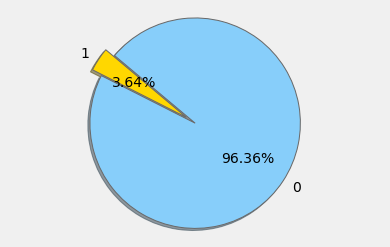

In [5]:
labels = '1', '0'
sizes = [train[train.target==1].shape[0],train[train.target==0].shape[0]]
colors = ['gold', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

Scikit-Learn provide StratifiedShuffleSplit API by preserving the percentage of samples for each class.

Imbalanced classification is a supervised learning problem where one class outnumbers other class by a large proportion. This problem is faced more frequently in binary classification problems than multi-level classification problems. The reasons which leads to reduction in accuracy of ML algorithms on imbalanced data sets:

1. ML algorithms struggle with accuracy because of the unequal distribution in dependent variable.
2. This causes the performance of existing classifiers to get biased towards majority class.
3. The algorithms are accuracy driven i.e. they aim to minimize the overall error to which the minority class contributes very little.
4. ML algorithms assume that the data set has balanced class distributions.
5. They also assume that errors obtained from different classes have same cost

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.dummy import DummyClassifier

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=0)

X = train.drop(['id','target'], axis=1).values
y = train.target.values

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    break
    
# negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)

# therefore the dummy 'most_frequent' classifier always predicts class 0
dummy_majority.score(X_test, y_test)

0.96355368383324747

Now, you should know why Normalized Gini is the metric in this case, instead of accuracy. (If we just used a majority class to assign values to all records, we will still be having a high accuracy.)

One Specific example, if this bullshiter recognize a terrorist isnt a terroist, it will become a disaster.


### 2. Feature Engineering

#### $\star$ Data types

Datatype check is carried out to see what kind of datatypes the train set is comprised of : integers or characters or floats just to gain a better overview of the data we were provided with.

In [7]:
from collections import Counter
Counter(train.dtypes.values)

Counter({dtype('int64'): 49, dtype('float64'): 10})

As alluded to above, there are a total of 59 columns that make up the train dataset and as we can observe from this check, there are only two datatypes - Integer and floats. Porto Seguro has actually provided us data with headers that come suffixed with abbreviations such as "_bin", "_cat" and "_reg", where they have given us a rough explanation that _bin indicates binary features while _cat indicates categorical features whilst the rest are either continuous or ordinal features. Here I shall simplify this a bit further just by looking at float values (probably only the continuous features) and integer datatypes (binary, categorical and ordinal features).

#### $\star$ Binary variables

Another aspect of the data that we may want to inspect would be the columns that only contain binary values, i.e where values take on only either of the two values 1 or 0. Proceeding, we store all columns that contain these binary values and then generate a vertical plotly barplot of these binary values as follows:

In [8]:
bin_col = [col for col in train.columns if '_bin' in col]

zero_list = []
one_list = []
for col in bin_col:
    zero_list.append((train[col]==0).sum())
    one_list.append((train[col]==1).sum())
    
trace1 = go.Bar(x=bin_col, y=zero_list, name='Zero count')
trace2 = go.Bar(x=bin_col, y=one_list, name='One count')
data = [trace1, trace2]

layout = go.Layout(barmode='stack', title='Count of 1 and 0 in binary variables')
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')    

#### $\star$ Categorical variables

There a few categorical variables indexed with the tag postfix.

In [9]:
nb = sum(["cat" in s for s in train.columns])
print('categorical variables: {} '.format(nb))

categorical variables: 14 


These variables contain integers. Below, I represent the number of categories in each of these variables.

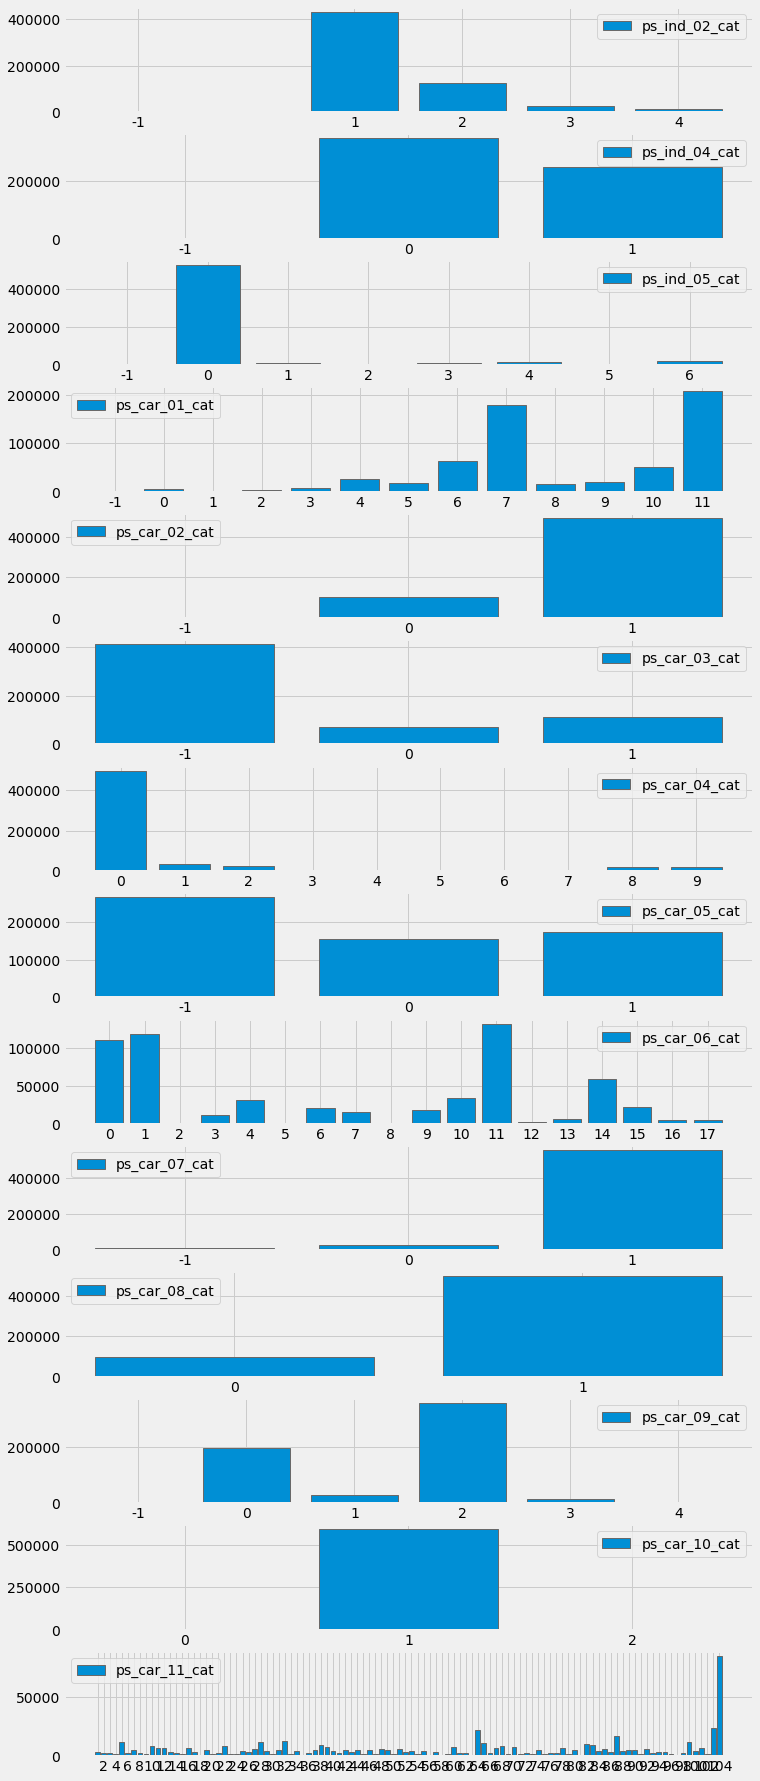

In [10]:
ind = 0
for col in train.columns:
    if "cat" not in col: continue
    ind += 1
    fig = plt.figure(1, figsize=(11,30))
    ax1 = fig.add_subplot(nb,1,ind)    
    x_axis = list(train[col].value_counts().index)
    y_axis = list(train[col].value_counts())
    x_label = list(map(int,x_axis))
    if len(x_label) > 50:
        x_label = [s if s%2 == 0 else '' for i,s in enumerate(x_label)]
    plt.xticks(x_axis, x_label)
    ax1.bar(x_axis, y_axis, align = 'center', label = col)
    plt.legend(prop={'size': 14})
    if ind == nb: break

#### $\star$ Numerical variables  - Variables with the calc tag

By looking at the numerical variables, we can distinguish a few different kinds of distributions. First, if we consider the variables indexed with the calc tag, we see that we have either uniform distributions:

In [11]:
train_df = train.copy()
train_df.drop(['id', 'target'], axis = 1, inplace = True)
nb  = sum([("cat" not in s) and ('bin' not in s) for s in train_df.columns])
print('numerical variables: {} '.format(nb))

numerical variables: 26 


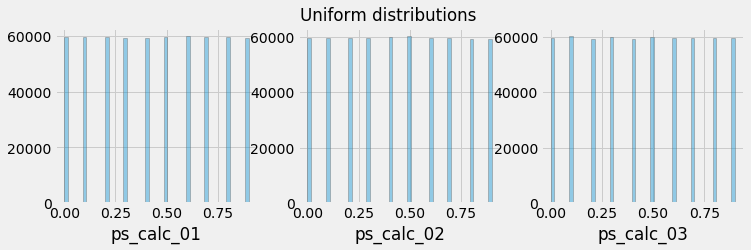

In [12]:
# uniform distributions
list_cols_uniform = ['ps_calc_01', 'ps_calc_02', 'ps_calc_03']

ind = 0
for col in list_cols_uniform:
    ind += 1
    fig = plt.figure(1, figsize=(11,3))
    ax1 = fig.add_subplot(1, 3, ind)    
    sns.distplot(train_df[col].dropna(), kde=False  )        
    if ind == nb: break
        
plt.suptitle('Uniform distributions');

or distributions that have a more shallow shape.

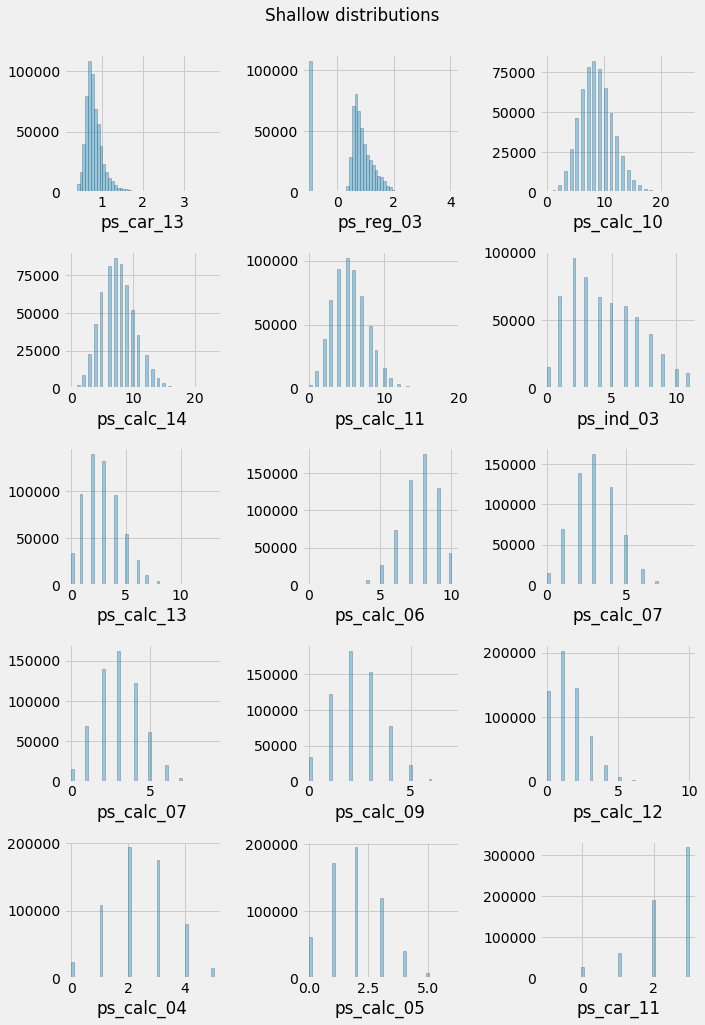

In [13]:
# shallow distributions: 
list_cols_shallow = ['ps_car_13', 'ps_reg_03', 'ps_calc_10', 'ps_calc_14', 'ps_calc_11',
                     'ps_ind_03', 'ps_calc_13', 'ps_calc_06', 'ps_calc_07', 'ps_calc_07',
                     'ps_calc_09', 'ps_calc_12', 'ps_calc_04', 'ps_calc_05', 'ps_car_11']

ind = 0
for col in list_cols_shallow:
    ind += 1
    fig = plt.figure(1, figsize=(10,15))
    ax1 = fig.add_subplot(5, 3, ind)    
    sns.distplot(train_df[col].dropna(), kde=False  )        
    if ind == nb: break
        
fig.suptitle('Shallow distributions')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

Given the regularity of the distributions found for these variables (and assuming that the calc tag carry some meaning), we may assume that the above variables come from some statistical model.

#### $\star$ Numerical variables  - Empirical distributions

The other numerical variables in the dataframe do not show such smooth shapes and are probably obtained through a census.

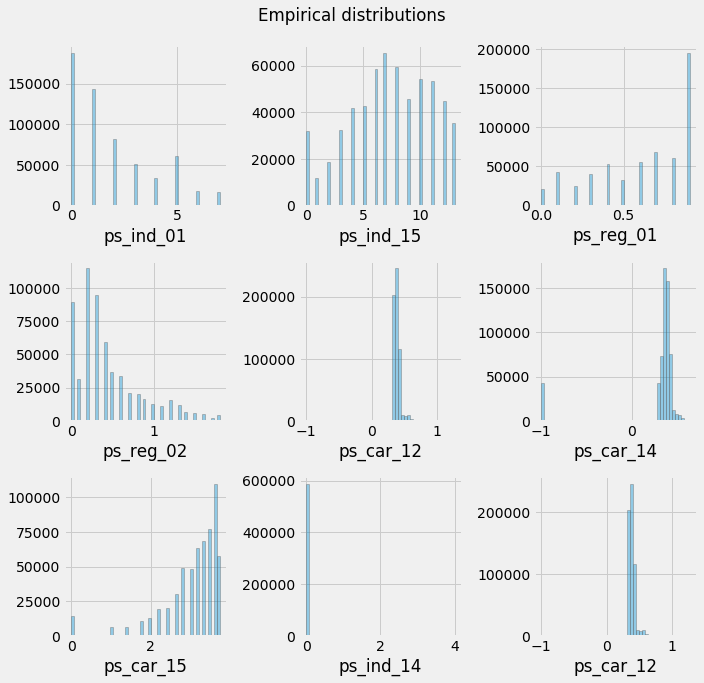

In [14]:
list_cols_other   = ['ps_ind_01', 'ps_ind_15', 'ps_reg_01', 'ps_reg_02', 'ps_car_12',
                     'ps_car_14', 'ps_car_15', 'ps_ind_14', 'ps_car_12']

ind = 0
for col in list_cols_other:
    ind += 1
    fig = plt.figure(1, figsize=(10,10))
    ax1 = fig.add_subplot(3, 3, ind)    
    sns.distplot(train_df[col].dropna(), kde=False  )        
    if ind == nb: break
        
fig.suptitle('Empirical distributions')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

del train_df

### 3. Correlations

As a starter, let us generate some linear correlation plots just to have a quick look at how one column is linearly correlated to the next and perhaps start gaining some insight from there. Here I will use the seaborn statistical visualisation package to call a heatmap plot of the correlation values

In [15]:
train_float = train.select_dtypes(include=['float64'])
train_int = train.select_dtypes(include=['int64'])

#### $\star$ Correlation of float features

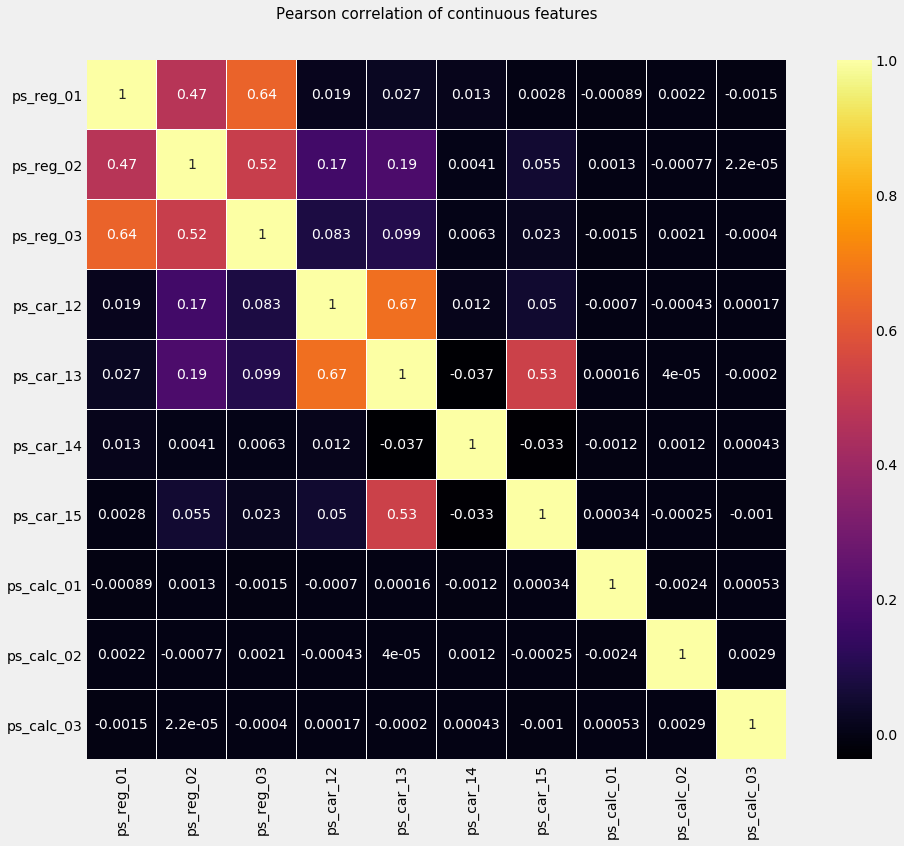

In [16]:
colormap = plt.cm.inferno
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(train_float.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

From the correlation plot, we can see that the majority of the features display zero or no correlation to one another. This is quite an interesting observation that will warrant our further investigation later down. For now, the features that display a somewhat substantial positive correlation are listed as follows:

- (ps_reg_01, ps_reg_03)
- (ps_reg_02, ps_reg_03)
- (ps_car_12, ps_car_13)
- (ps_car_13, ps_car_15)

#### $\star$ Correlation of integer features

For the columns of interger datatype, I shall now switch to using the Plotly library to show how one can also generate a heatmap of correlation values interactively. Much like our earlier Plotly plot, we generate a heatmap object by simply invoking the "go.Heatmap". Here we have to provide values to three different axes, where x and y axes take in the column names while the correlation value is provided by the z-axis. The colorscale attribute takes in keywords that correspond to different color palettes that you will see in the heatmap where in this example, I have used the Greys colorscale (others include Portland and Viridis - try it for yourself).

In [17]:
data = [ go.Heatmap(
            z= train_int.corr().values,
            x=train_int.columns.values,
            y=train_int.columns.values,
            colorscale='Viridis',
            text = True ,
            opacity = 1.0 )]

layout = go.Layout(
            title='Pearson Correlation of Integer-type features',
            xaxis = dict(ticks='', nticks=36),
            yaxis = dict(ticks='' ),
            width = 900, height = 700)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

Similarly, we can observe that there are a huge number of columns that are not linearly correlated with each other at all, evident from the fact that we observe quite a lot of 0 value cells in our correlation plot. This is quite a useful observation to us, especially if we are trying to perform dimensionality reduction transformations such as Principal Component Analysis (PCA), this would require a certain degree of correlation . We can note that the features of interest are as follows:

Negatively correlated features : ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin

### 4. Missing Values Analysis

Let us quick look at whether there are any null values in the train dataset as follows.

In [18]:
# any() applied twice to check run the isnull check across all columns.
train.isnull().any().any()

False

Our null values check returns False but however, this does not really mean that this case has been closed as the data is also described as "Values of -1 indicate that the feature was missing from the observation". Therefore I take it that Porto Seguro has simply conducted a blanket replacement of all null values in the data with the value of -1. Let us now inspect if there where any missing values in the data.

Here we can see that which columns contained -1 in their values so we could easily for example make a blanket replacement of all -1 with nulls first as follows.

In [19]:
train_df = train.replace(-1, np.NaN)

Next, we can use one of our resident Kaggler's creation "Missingno" package which is a most useful and convenient tool in visualising missing values in the dataset.

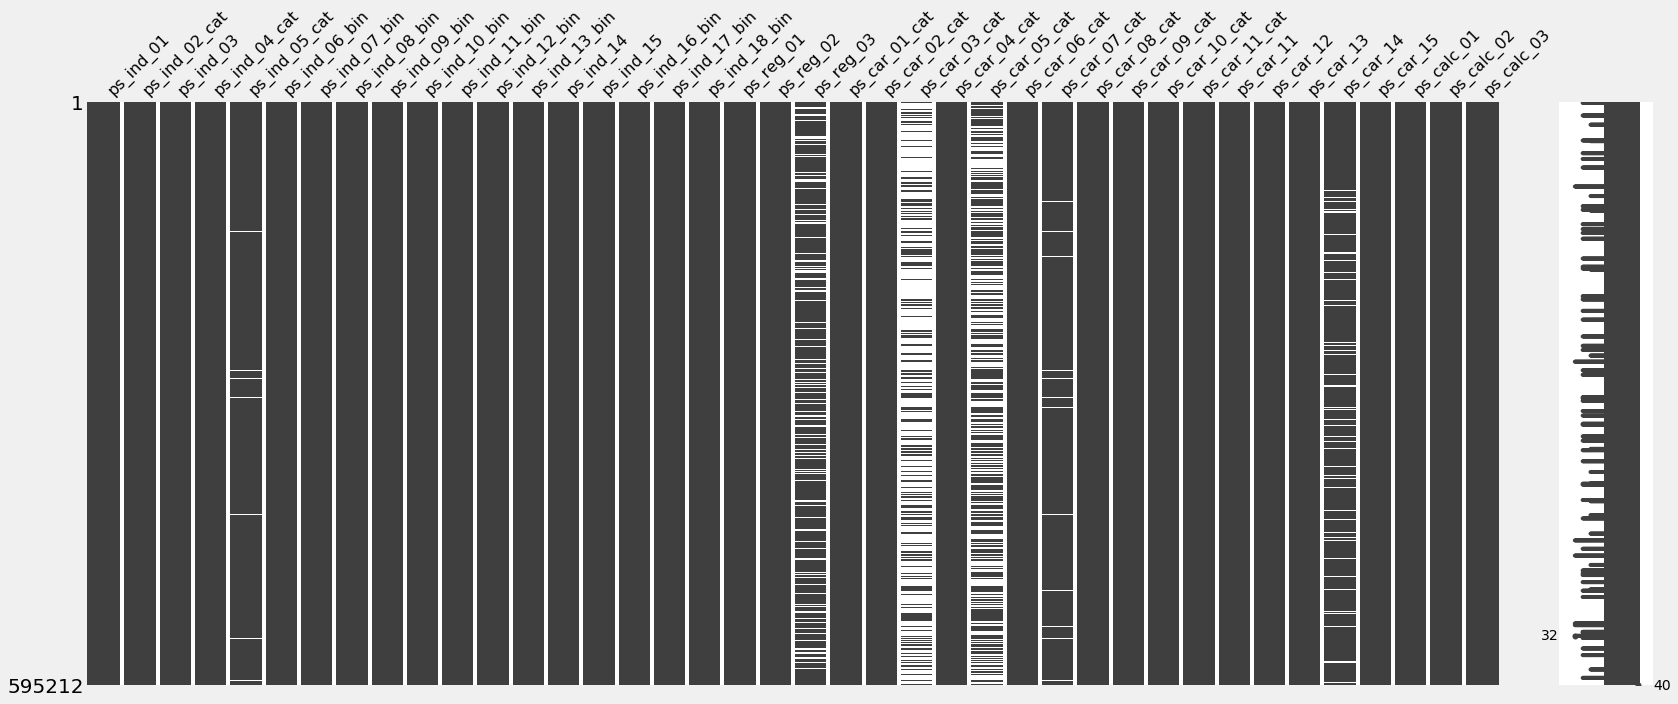

In [20]:
# nullity or missing values by columns
import missingno as msno
msno.matrix(df=train_df.iloc[:,2:42])

As we can see, the missing values now become much more apparent and clear in the visualisation, where the empty white bands superposed on the vertical dark bands (non-missing data) reflect the nullity of the data. In this instance, we can observe that there are 7 features out of the 59 total features that actually contained null values.

In [21]:
missing_df = train_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['ratio'] = round(missing_df['missing_count'] / train_df.shape[0],4)
missing_df[missing_df['ratio']>0][['column_name', 'missing_count','ratio']].sort_values(by='ratio',ascending=False)

,column_name,missing_count,ratio
25,ps_car_03_cat,411231,0.6909
27,ps_car_05_cat,266551,0.4478
22,ps_reg_03,107772,0.1811
37,ps_car_14,42620,0.0716
29,ps_car_07_cat,11489,0.0193
6,ps_ind_05_cat,5809,0.0098
31,ps_car_09_cat,569,0.0010
3,ps_ind_02_cat,216,0.0004
23,ps_car_01_cat,107,0.0002
5,ps_ind_04_cat,83,0.0001


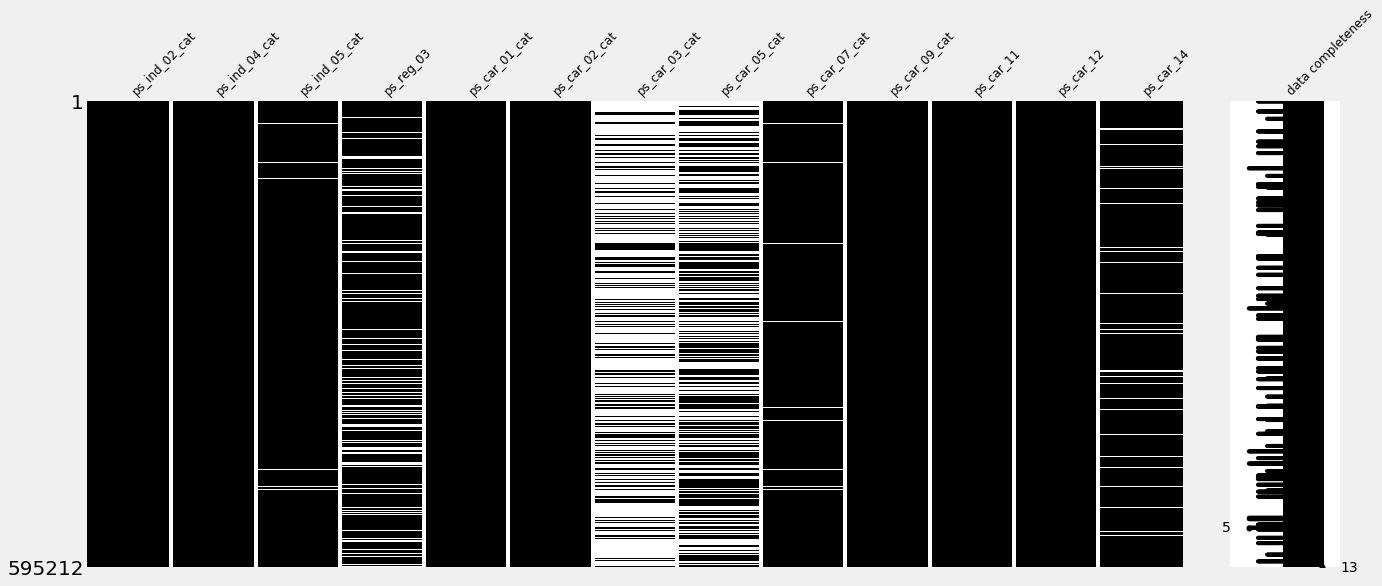

In [22]:
def missingno_matrix(df):
    missingValueColumns = df.columns[df.isnull().any()].tolist()
    msno.matrix(df[missingValueColumns],width_ratios=(10,1),\
            figsize=(20,8),color=(0,0, 0),fontsize=12,sparkline=True,labels=True)
    plt.show()
    
missingno_matrix(train_df)

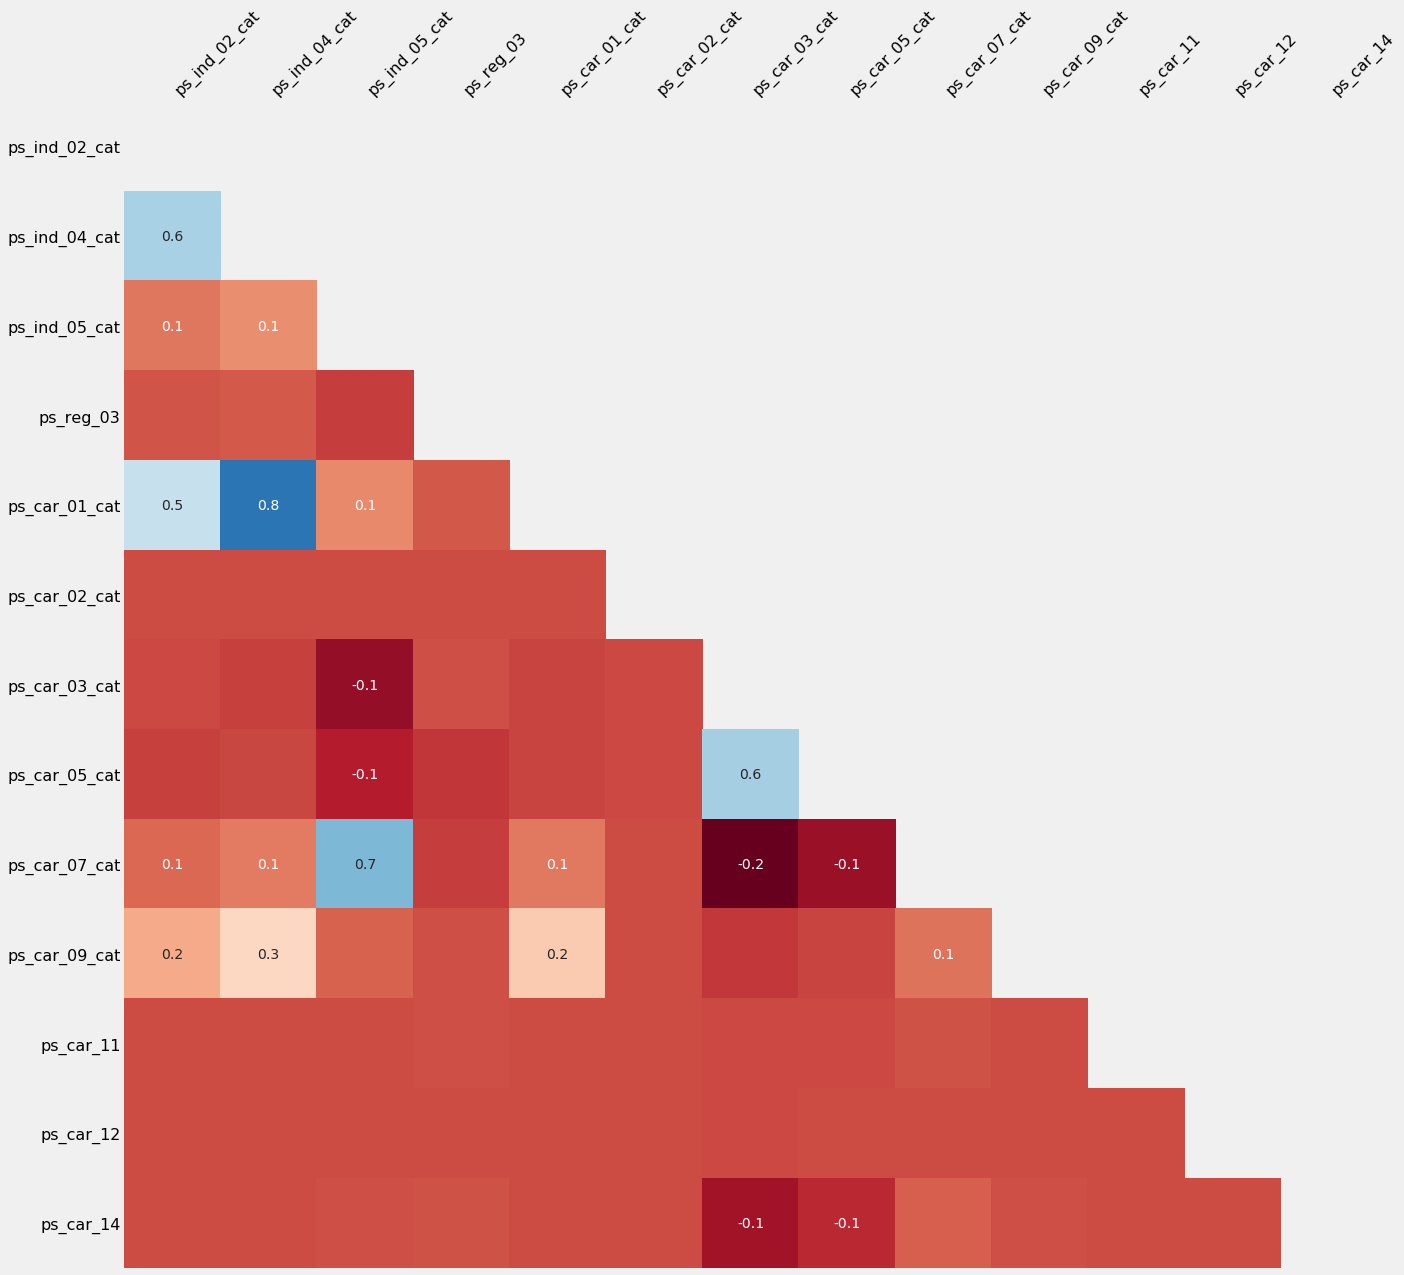

In [23]:
def missingno_heatmap(df):
    missingValueColumns = df.columns[df.isnull().any()].tolist()
    msno.heatmap(df[missingValueColumns],figsize=(20,20))
    plt.show()
    
missingno_heatmap(train_df)

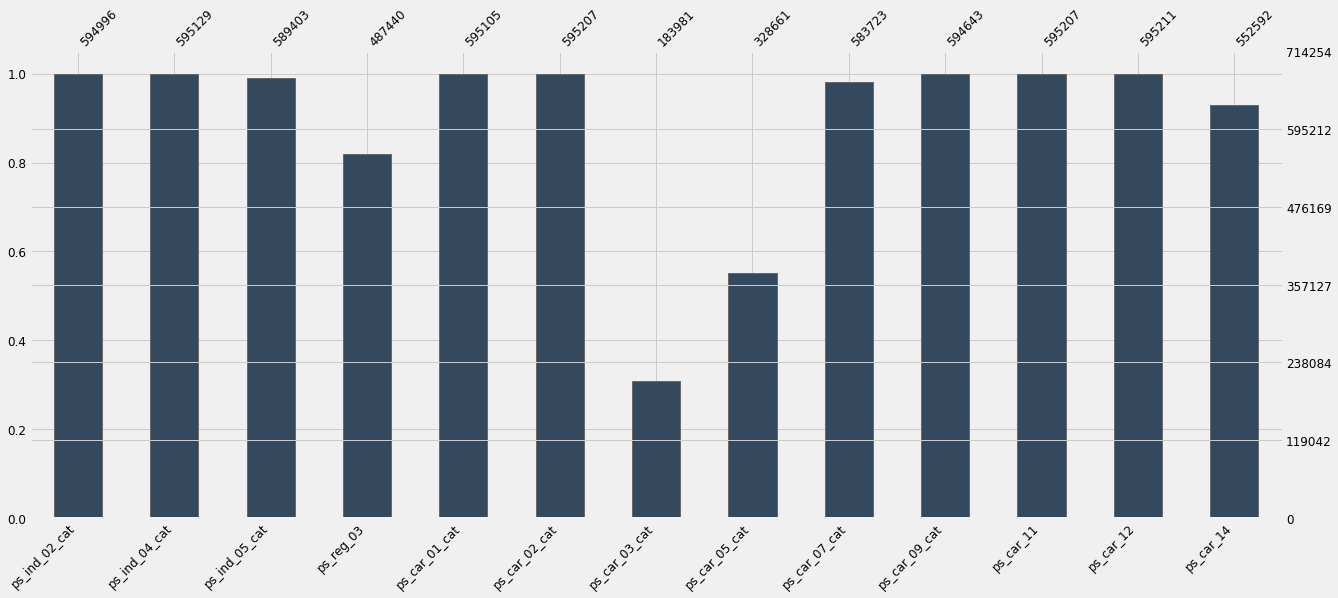

In [24]:
def missing_bar(df):
    missingValueColumns = df.columns[df.isnull().any()].tolist()
    msno.bar(df[missingValueColumns],figsize=(20,8),color="#34495e",fontsize=12,labels=True)
    plt.show()
    
missing_bar(train_df)

Now, we can have a look at the percentage of missing values in each variable. I switch to the standard nomenclature and convert the -1 values to np.nan (skipping this step would not allow to use pandas facilities such like the isnull()method that allows to quickly access undefined quantities). I define the get_info()function that outputs the data types of each variable, the number of null values and their percentage with rexpect to the total number of entries.

In [25]:
def get_info(df):
    """
    Gives some infos on columns types and number of null values
    """
    print('dataframe dimensions:', df.shape)
    tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
    df.replace({-1:np.nan}, inplace = True) # TAG NULL VALUES
    tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
    tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100)
                             .T.rename(index={0:'null values (%)'}))
    return tab_info

train_info = get_info(train_df)
train_info

dataframe dimensions: (595212, 59)


,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
column type,int64,int64,int64,float64,int64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,int64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
null values (nb),0,0,0,216,0,83,5809,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,107772,107,5,411231,0,266551,0,11489,0,569,0,0,5,1,0,42620,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
null values (%),0,0,0,0.0362896,0,0.0139446,0.975955,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18.1065,0.0179768,0.000840037,69.0898,0,44.7825,0,1.93024,0,0.0955962,0,0,0.000840037,0.000168007,0,7.16047,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


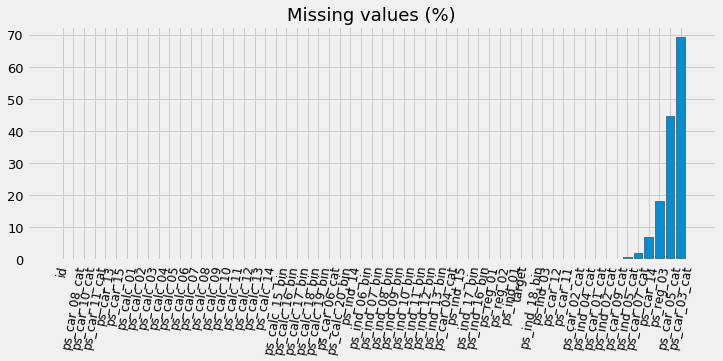

In [26]:
train_info = train_info.T.reset_index()
train_info = train_info.sort_values('null values (%)').reset_index(drop = True)

y_axis  = train_info['null values (%)'] 
x_label = train_info['index']
x_axis  = train_info.index

fig = plt.figure(figsize=(11, 4))
plt.xticks(rotation=80, fontsize = 14)
plt.yticks(fontsize = 13)
plt.bar(x_axis, y_axis)
plt.xticks(x_axis, x_label, fontsize = 12)
plt.title('Missing values (%)', fontsize = 18)

del train_df

The target variable, which is to be predicted, indicate wether a claim was filled or not.

Apart from this variable, the dataframe contains 58 variables:
- id: the identifiant of the user
- 57 columns named ps_tag1_NUM(_tag2) with:

    - tag1 ∈ {ind, reg, car, calc }
    - NUM ∈ [1:20]
    - tag2 ∈ {bin, cat } indicate respectively binary and categorical features. This tag is optional.

The tables given above shows that there are a few undefined values, in particular for the following variables:

- ps_reg_03: 18%
- ps_car_03_cat: 69%
- ps_car_05_cat: 45%
- ps_car_14: 7%

## Model Building

### 1. XGBoost

In [27]:
# define the gini metric 
def gini(actual, pred, cmpcol = 0, sortcol = 1):
    assert( len(actual) == len(pred) )
    all = np.asarray(np.c_[ actual, pred, np.arange(len(actual)) ], dtype=np.float)
    all = all[ np.lexsort((all[:,2], -1*all[:,1])) ]
    totalLosses = all[:,0].sum()
    giniSum = all[:,0].cumsum().sum() / totalLosses
    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)
 
def gini_normalized(a, p):
    return gini(a, p) / gini(a, a)

# create an XGBoost-compatible metric from gini
def gini_xgb(preds, dtrain):
    labels = dtrain.get_label()
    gini_score = gini_normalized(labels, preds)
    return 'gini', gini_score

In [28]:
id_train = train['id'].values
id_test = test['id'].values
y = train.target.values

In [29]:
# drop  variables as we don't want to train on them,
# the other 57 columns are all numerical and can be trained on without preprocessing

train = train.drop(['id','target','ps_ind_10_bin','ps_ind_11_bin','ps_ind_12_bin',\
                'ps_ind_13_bin','ps_car_03_cat','ps_car_05_cat'], axis=1)
test = test.drop(['id','ps_ind_10_bin','ps_ind_11_bin','ps_ind_12_bin',\
                'ps_ind_13_bin','ps_car_03_cat','ps_car_05_cat'], axis=1)
                
print('Train shape:', train.shape)
print('Test shape:', test.shape)

Train shape: (595212, 51)
Test shape: (892816, 51)


In [30]:
# create a submission file
submission = pd.DataFrame()
submission['id'] = id_test
submission['target'] = np.zeros_like(id_test)

In [31]:
# set xgb parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.03
params['silent'] = True
params['max_depth'] = 6
params['subsample'] = 0.9
params['colsample_bytree'] = 0.85
params['colsample_bylevel'] = 0.9

In [32]:
import xgboost as xgb

X = train.values
x_test = test.values

kfold = 3
# take a random 30% of the dataset as validation data
sss = StratifiedShuffleSplit(n_splits=kfold, test_size=0.7, random_state=0)

xgbscores = []
for i, (train_index, test_index) in enumerate(sss.split(X, y)):
    print('[Fold %d/%d]' % (i + 1, kfold))
    X_train, X_valid = X[train_index], X[test_index]
    y_train, y_valid = y[train_index], y[test_index]
    # Convert our data into LGBoost format
    d_train = xgb.DMatrix(X_train, y_train)
    d_valid = xgb.DMatrix(X_valid, y_valid)
    d_test = xgb.DMatrix(x_test)
    watchlist = [(d_train, 'train'), (d_valid, 'valid')]

    # Train the model! We pass in a max of 1,000 rounds (with early stopping after 100)
    # and the custom metric (maximize=True tells xgb that higher metric is better)
    model = xgb.train(params, d_train, 500, watchlist, early_stopping_rounds=20, feval=gini_xgb, 
                      maximize=True, verbose_eval=100)

    print('[Fold %d/%d Prediciton:]' % (i + 1, kfold))
    # Predict on our test data
    p_test = model.predict(d_test)
    submission['target'] += p_test/kfold

[Fold 1/3]
[0]	train-error:0.036413	valid-error:0.03652	train-gini:0.21671	valid-gini:0.178702
Multiple eval metrics have been passed: 'valid-gini' will be used for early stopping.

Will train until valid-gini hasn't improved in 20 rounds.
[100]	train-error:0.036447	valid-error:0.036448	train-gini:0.364182	valid-gini:0.247117
[200]	train-error:0.036441	valid-error:0.036448	train-gini:0.481818	valid-gini:0.258692
Stopping. Best iteration:
[241]	train-error:0.03643	valid-error:0.036448	train-gini:0.520483	valid-gini:0.259642

[Fold 1/3 Prediciton:]
[Fold 2/3]
[0]	train-error:0.036346	valid-error:0.036527	train-gini:0.1882	valid-gini:0.179356
Multiple eval metrics have been passed: 'valid-gini' will be used for early stopping.

Will train until valid-gini hasn't improved in 20 rounds.
[100]	train-error:0.036447	valid-error:0.036448	train-gini:0.35113	valid-gini:0.257053
[200]	train-error:0.036413	valid-error:0.03645	train-gini:0.463556	valid-gini:0.270402
Stopping. Best iteration:
[274]	t

In [33]:
submission.head()

,id,target
0,0,0.027480
1,1,0.025106
2,2,0.031232
3,3,0.016181
4,4,0.036496


### 2. Feature Importance

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework.

In [34]:
from xgboost import XGBClassifier # Gradeint Boosting
model = XGBClassifier(eta = 0.01, max_depth = 4, subsample = 0.8, colsample_bytree= 0.8)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, eta=0.01, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=1, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=0, silent=True, subsample=0.8)

In [35]:
feat_names = train.columns
feat_importances = model.feature_importances_

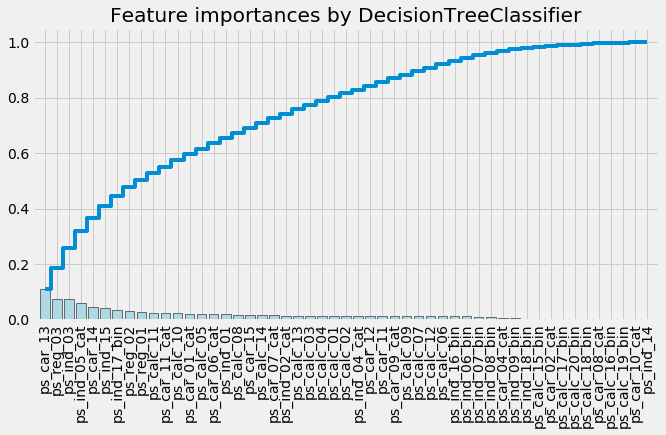

In [36]:
indices = np.argsort(feat_importances)[::-1]
plt.figure(figsize=(10,5))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), feat_importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(feat_importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

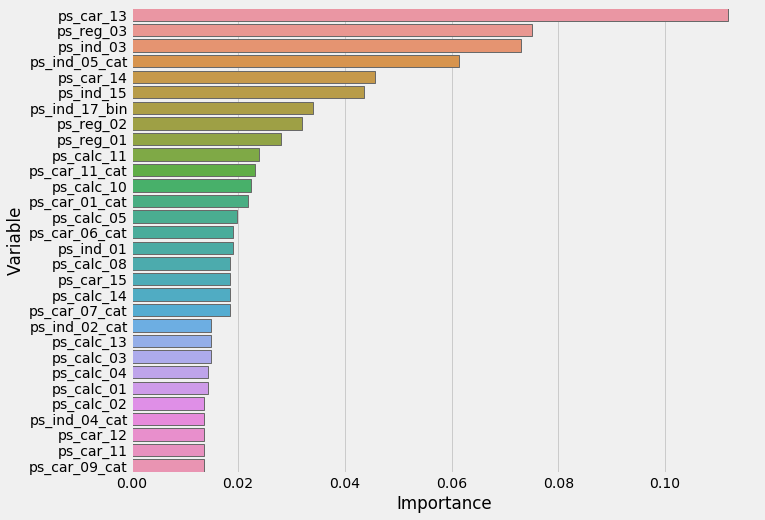

In [37]:
imp_map = pd.Series(feat_importances,index=feat_names)
imp_map.sort_values(ascending=False,inplace=True)

top30 = pd.Series(imp_map[0:30]).reset_index()
top30.columns = ['Variable','Importance']

plt.figure(figsize=(10,8))
sns.barplot(top30['Importance'],top30['Variable'])
plt.xlabel('Importance')